In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
import plotly.graph_objects as go
import scipy.stats as st

# Data Cleaning for All Datasets

In [3]:
# Read in shark data
eat = pd.read_excel("SharkData.xlsx", sheet_name = 0)
targets = pd.read_excel("SharkData.xlsx", sheet_name = 1)
drops = pd.read_excel("SharkData.xlsx", sheet_name = 2)
other_factors = pd.read_excel("SharkData.xlsx", sheet_name = 3)

In [4]:
# Clean eating dataset
eat = eat.iloc[1:,:-1]
eat.rename(columns = {"Unnamed: 14":'Etc. Comments', "Pieces Eaten": "Date"}, inplace = True)

#get rid of null values at end of dataset
eat = eat.head(582)

# Change date to just date format, not datetime
eat['Date'] = pd.to_datetime(eat['Date']).dt.date


eat.tail()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total:,Etc. Comments
578,2020-09-22,6.0,0.0,1.0,2.0,6.0,0.0,4.0,1.0,0.0,0.0,5.0,1.0,26.0,NaN
579,2020-09-24,0.0,9.0,0.0,7.0,5.0,5.0,7.0,0.0,1.0,2.0,2.0,6.0,44.0,NaN
580,2020-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,2.0,3.0,3.0,12.0,NaN
581,2020-09-27,5.0,6.0,3.0,6.0,4.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,33.0,NaN
582,2020-09-29,10.0,3.0,1.0,1.0,4.0,2.0,7.0,4.0,4.0,0.0,2.0,0.0,38.0,NaN


In [5]:
# Clean Drops Dataset
drops = drops.iloc[1:,:-1]
drops['Drops'] = pd.to_datetime(drops['Drops']).dt.date

In [6]:
# Clean Targets Dataset
targets = targets.iloc[1:,:-1]
targets.rename(columns = {"Unnamed: 14":'Etc. Comments', "Targets": "Date"}, inplace = True)

#get rid of null values at end of dataset
targets = targets.head(582)

# Change date to just date format, not datetime
targets['Date'] = pd.to_datetime(targets['Date']).dt.date


targets.tail()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total:
578,2020-09-22,6.0,1.0,4.0,6.0,5.0,4.0,7.0,2.0,1.0,5.0,4.0,1.0,46.0
579,2020-09-24,8.0,18.0,2.0,9.0,10.0,10.0,11.0,5.0,6.0,3.0,7.0,9.0,98.0
580,2020-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,3.0,5.0,8.0,24.0
581,2020-09-27,10.0,19.0,9.0,10.0,8.0,16.0,3.0,NaN,NaN,NaN,NaN,NaN,75.0
582,2020-09-29,15.0,5.0,6.0,6.0,4.0,4.0,7.0,4.0,1.0,4.0,4.0,1.0,61.0


# Create Subset Groups

In [7]:
# All Sharks Subset
All_Sharks = eat[['Ross', 'Chandler','BT1','BT2','BT3','BT4','BT5','GR1','GR2','GR3','GR4', 'GR5','Total: ']]

# All SS Subset
All_SS = eat[['Ross', 'Chandler']]

# All BT Subset
All_BT = eat[['BT1', 'BT2', 'BT3', 'BT4', 'BT5']]

# All GR Subset
All_GR = eat[['GR1', 'GR2', 'GR3', 'GR4', 'GR5']]

# Male Subset
Male = eat[["BT1","BT5","GR1","Ross","Chandler"]]

# Female Subset
female = eat[["BT2","BT3","BT4","GR2","GR3","GR4","GR5"]]

# Append all subsets to original datasets
# eat dataset
eat["All_GR"] = eat['GR1'] + eat['GR2'] + eat['GR3'] + eat['GR4'] + eat['GR5']
eat["All_BT"] = eat['BT1'] + eat['BT2'] + eat['BT3'] + eat['BT4'] + eat['BT5']
eat["All_SS"] = eat['Ross'] + eat['Chandler']
eat["male"] = eat[["BT1","BT5","GR1","Ross","Chandler"]].sum(axis = 1)
eat["female"] = eat[["BT2","BT3","BT4","GR2","GR3","GR4","GR5"]].sum(axis = 1)

# drop dataset
drops["All_GR"] = drops['GR1'] + drops['GR2'] + drops['GR3'] + drops['GR4'] + drops['GR5']
drops["All_BT"] = drops['BT1'] + drops['BT2'] + drops['BT3'] + drops['BT4'] + drops['BT5']
drops["All_SS"] = drops['Ross'] + drops['Chandler']
drops["male"] = drops[["BT1","BT5","GR1","Ross","Chandler"]].sum(axis = 1)
drops["female"] = drops[["BT2","BT3","BT4","GR2","GR3","GR4","GR5"]].sum(axis = 1)

# target dataset
targets["All_GR"] = targets['GR1'] + targets['GR2'] + targets['GR3'] + targets['GR4'] + targets['GR5']
targets["All_BT"] = targets['BT1'] + targets['BT2'] + targets['BT3'] + targets['BT4'] + targets['BT5']
targets["All_SS"] = targets['Ross'] + targets['Chandler']
targets["male"] = targets[["BT1","BT5","GR1","Ross","Chandler"]].sum(axis = 1)
targets["female"] = targets[["BT2","BT3","BT4","GR2","GR3","GR4","GR5"]].sum(axis = 1)


In [8]:
eat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total:,Etc. Comments,All_GR,All_BT,All_SS,male,female
1,2017-12-05,0.0,5.0,3.0,6.0,5.0,4.0,4.0,0.0,0.0,2.0,3.0,1.0,33.0,NaN,6.0,22.0,5.0,12.0,21.0
2,2017-12-07,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,0.0,2.0,1.0,1.0,2.0
3,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,3.0,1.0,0.0,6.0,NaN,6.0,NaN,NaN,2.0,4.0
4,2017-12-10,5.0,1.0,1.0,3.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,8.0,6.0,7.0,7.0
5,2017-12-12,2.0,2.0,0.0,5.0,2.0,4.0,5.0,0.0,2.0,3.0,2.0,0.0,27.0,NaN,7.0,16.0,4.0,9.0,18.0


In [9]:
drops.head()

,Drops,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total:,All_GR,All_BT,All_SS,male,female
1,2017-12-05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,2.0,1.0,0.0,0.0,3.0
2,2017-12-07,0.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,10.0,2.0,7.0,1.0,4.0,6.0
3,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,0.0,1.0
4,2017-12-10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,1.0,0.0
5,2017-12-12,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,2.0,0.0,0.0,3.0


In [10]:
targets.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total:,All_GR,All_BT,All_SS,male,female
1,2017-12-05,3.0,0.0,4.0,3.0,0.0,2.0,2.0,1.0,1.0,3.0,3.0,0.0,22.0,8.0,11.0,3.0,10.0,12.0
2,2017-12-07,4.0,5.0,2.0,2.0,5.0,3.0,5.0,0.0,0.0,2.0,2.0,0.0,30.0,4.0,17.0,9.0,16.0,14.0
3,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,0.0,3.0,8.0,8.0,NaN,NaN,1.0,7.0
4,2017-12-10,4.0,7.0,0.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,4.0,11.0,11.0,4.0
5,2017-12-12,3.0,1.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,5.0,1.0,3.0,26.0,11.0,11.0,4.0,9.0,17.0


# T test for Shutdown vs. Open Groups

# Number of Pieces Eaten

In [11]:
start_date = pd.to_datetime('03-14-2020')
end_date = pd.to_datetime('05-09-2020')
corona_times_eat = (eat['Date'] >= start_date) & (eat['Date'] < end_date)
corona_eat = eat[corona_times_eat]

# Create dataset of the all the time that the Aquarium was open to the public to compare
open_eat_times = (eat['Date'] < start_date) | (eat['Date'] >= end_date)
open_eat = eat[open_eat_times]

In [12]:
# Perform T-Test for each individual Shark
for column in All_Sharks:
    twosample_results = st.ttest_ind(corona_eat[column], open_eat[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 5))

Ross : Test Statistic = -1.61396 P-Value = 0.10726
Chandler : Test Statistic = -0.40546 P-Value = 0.68534
BT1 : Test Statistic = -0.49799 P-Value = 0.61874
BT2 : Test Statistic = 2.87097 P-Value = 0.00429
BT3 : Test Statistic = -1.95872 P-Value = 0.05078
BT4 : Test Statistic = -0.20414 P-Value = 0.83834
BT5 : Test Statistic = -1.04968 P-Value = 0.29445
GR1 : Test Statistic = -1.05797 P-Value = 0.29066
GR2 : Test Statistic = -1.38793 P-Value = 0.16587
GR3 : Test Statistic = -0.11202 P-Value = 0.91086
GR4 : Test Statistic = -0.90367 P-Value = 0.36667
GR5 : Test Statistic = -1.37777 P-Value = 0.16898
Total:  : Test Statistic = -0.81231 P-Value = 0.41695


In [13]:
# Perform T-Test for species and genders
gender_and_species = eat[['male', 'female', 'All_GR', 'All_BT', 'All_SS']]
for column in gender_and_species:
    twosample_results = st.ttest_ind(corona_eat[column], open_eat[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 5))

male : Test Statistic = -1.09837 P-Value = 0.2725
female : Test Statistic = -0.1688 P-Value = 0.86602
All_GR : Test Statistic = -1.756 P-Value = 0.07979
All_BT : Test Statistic = -0.24767 P-Value = 0.8045
All_SS : Test Statistic = -1.44172 P-Value = 0.1501


After correcting for the number of T-tests, these are the significant p-values for each subset:

In [14]:
print('Individual Sharks:', round(0.05 / 12, 5))
print('Species:', round(0.05 / 3, 5))
print("Male/Female", round(0.05 / 2, 5))
print("Total:", 0.05)

Individual Sharks: 0.00417
Species: 0.01667
Male/Female 0.025
Total: 0.05


Based on these significant values, there are no significant p-values from any individual shark or subset as a result of our T-tests. We can conclude that there was no significant difference in the number of pieces eaten between the COVID lockdown and the time the Aquarium was open to the public. However, it does look like BT2 was marginally significant and it was just slightly over the updated p-value and should be mentioned.

# Number of Pieces Dropped

In [15]:
# Create Drops Data for Corona time and open to the public time to perform T-Test
corona_times_drop = (drops['Drops'] >= start_date) & (drops['Drops'] < end_date)
corona_drop = drops[corona_times_drop]

# Create dataset of the all the time that the Aquarium was open to the public to compare
open_drop_times = (drops['Drops'] < start_date) | (drops['Drops'] >= end_date)
open_drop = drops[open_drop_times]

In [16]:
# Perform T-Test for each individual Shark
for column in All_Sharks:
    twosample_results = st.ttest_ind(corona_drop[column], open_drop[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0],5), "P-Value =", round(twosample_results[1],5))

Ross : Test Statistic = 1.58969 P-Value = 0.11263
Chandler : Test Statistic = 0.43535 P-Value = 0.66352
BT1 : Test Statistic = 0.24058 P-Value = 0.80999
BT2 : Test Statistic = 3.89072 P-Value = 0.00012
BT3 : Test Statistic = 1.67011 P-Value = 0.09562
BT4 : Test Statistic = 2.15166 P-Value = 0.03197
BT5 : Test Statistic = 3.07718 P-Value = 0.00222
GR1 : Test Statistic = -0.29879 P-Value = 0.76525
GR2 : Test Statistic = 0.35249 P-Value = 0.72464
GR3 : Test Statistic = 0.49377 P-Value = 0.62171
GR4 : Test Statistic = 0.61508 P-Value = 0.53882
GR5 : Test Statistic = 0.16739 P-Value = 0.86714
Total:  : Test Statistic = 3.54939 P-Value = 0.00042


In [17]:
# Perform T-Test for species and genders
gender_and_species_drop = drops[['male', 'female', 'All_GR', 'All_BT', 'All_SS']]
for column in gender_and_species_drop:
    twosample_results = st.ttest_ind(corona_drop[column], open_drop[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0],5), "P-Value =", round(twosample_results[1],5))

male : Test Statistic = 1.84951 P-Value = 0.06489
female : Test Statistic = 3.64153 P-Value = 0.0003
All_GR : Test Statistic = 0.57308 P-Value = 0.56689
All_BT : Test Statistic = 4.29426 P-Value = 2e-05
All_SS : Test Statistic = 1.17782 P-Value = 0.23951


Blacktip2 and Blcktip5 have significant p-values for drops, as well as the Blacktip subset and the female subset

# Number of Times Targeted

In [18]:
# Create Target Data for Corona time and open to the public time to perform T-Test
corona_times_target = (targets['Date'] >= start_date) & (targets['Date'] < end_date)
corona_target = targets[corona_times_target]

# Create dataset of the all the time that the Aquarium was open to the public to compare
open_target_times = (targets['Date'] < start_date) | (targets['Date'] >= end_date)
open_target = targets[open_target_times]

In [19]:
# Perform T-Test for each individual Shark
for column in All_Sharks:
    twosample_results = st.ttest_ind(corona_target[column], open_target[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0],5), "P-Value =", round(twosample_results[1],5))

Ross : Test Statistic = -2.2993 P-Value = 0.02196
Chandler : Test Statistic = -1.63313 P-Value = 0.10317
BT1 : Test Statistic = -1.53598 P-Value = 0.12527
BT2 : Test Statistic = 1.64821 P-Value = 0.10003
BT3 : Test Statistic = 0.75754 P-Value = 0.44914
BT4 : Test Statistic = 0.37776 P-Value = 0.70579
BT5 : Test Statistic = -1.69312 P-Value = 0.09115
GR1 : Test Statistic = -1.81694 P-Value = 0.06991
GR2 : Test Statistic = -0.29126 P-Value = 0.77099
GR3 : Test Statistic = -0.97071 P-Value = 0.33223
GR4 : Test Statistic = 0.29916 P-Value = 0.76496
GR5 : Test Statistic = -1.80879 P-Value = 0.07117
Total:  : Test Statistic = -1.05584 P-Value = 0.29148


In [20]:
# Perform T-Test for species and genders
gender_and_species_target = targets[['male', 'female', 'All_GR', 'All_BT', 'All_SS']]
for column in gender_and_species_target:
    twosample_results = st.ttest_ind(corona_target[column], open_target[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0],5), "P-Value =", round(twosample_results[1],5))

male : Test Statistic = -1.86336 P-Value = 0.06292
female : Test Statistic = 0.42712 P-Value = 0.66945
All_GR : Test Statistic = -1.45035 P-Value = 0.14768
All_BT : Test Statistic = -0.27715 P-Value = 0.7818
All_SS : Test Statistic = -2.35684 P-Value = 0.01887


There were no significant p-values in terms of number of pieces dropped between COVID times and regular open times. However, it does seem that Sand Bar Sharks are marginally significant because it was just slightly over the updated p-value and should be mentioned

# T tests for Light Training Vs. No Light Training

Since there were only 41 entries in our data that did not include light training, we will compare this time period with the 40 days immediately after light training began, the final 40 days of our dataset, and to all the days that did not have light training to see if there are significant differences in any of the dates.

# Number of Pieces Eaten

In [21]:
# Create dataset that includes days without light training
start_date = pd.to_datetime('02-15-2018')
#end_date = pd.to_datetime('05-09-2020')
no_light_e = (eat['Date'] < start_date)
no_light_eat = eat[no_light_e]

# Create dataset of first 40 days after light training was introduced
first_40 = (eat["Date"] >= start_date) & (eat["Date"] <= pd.to_datetime('04-28-2018'))
first_40_eat = eat[first_40]

# Create dataset of last 40 days of dataset
last_40 = eat.iloc[-40:]

# Create dataset of all non light training days
light = eat['Date'] >= start_date
light_eat = eat[light]

First we will perform the T-test between the no light training group and the first 40 days after light training was introduced:

In [22]:
# Perform T-Test for each individual Shark
for column in All_Sharks:
    twosample_results = st.ttest_ind(no_light_eat[column], first_40_eat[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 5))

Ross : Test Statistic = -1.41029 P-Value = 0.16362
Chandler : Test Statistic = -1.97072 P-Value = 0.05337
BT1 : Test Statistic = 0.08784 P-Value = 0.9303
BT2 : Test Statistic = 0.14512 P-Value = 0.8851
BT3 : Test Statistic = 0.62961 P-Value = 0.53134
BT4 : Test Statistic = -0.64733 P-Value = 0.51989
BT5 : Test Statistic = 0.22961 P-Value = 0.81919
GR1 : Test Statistic = 1.15358 P-Value = 0.25317
GR2 : Test Statistic = 0.19689 P-Value = 0.84457
GR3 : Test Statistic = 1.61052 P-Value = 0.11245
GR4 : Test Statistic = 0.02983 P-Value = 0.9763
GR5 : Test Statistic = -1.54532 P-Value = 0.12744
Total:  : Test Statistic = -0.29934 P-Value = 0.76545


In [23]:
# Perform T-Test for species and genders
for column in gender_and_species:
    twosample_results = st.ttest_ind(no_light_eat[column], first_40_eat[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 5))

male : Test Statistic = -1.20314 P-Value = 0.23247
female : Test Statistic = 0.11406 P-Value = 0.90947
All_GR : Test Statistic = 0.57841 P-Value = 0.56512
All_BT : Test Statistic = 0.33383 P-Value = 0.73969
All_SS : Test Statistic = -2.19435 P-Value = 0.03209


There were no significant p-values when conducting the T-tests between the time frame with no light training and the first 40 days of light training. Next we will perform the T-test between the no light training time frame and the last 40 days of the dataset with light training used:

In [24]:
# Perform T-Test for each individual Shark
for column in All_Sharks:
    twosample_results = st.ttest_ind(no_light_eat[column], last_40[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 10))

Ross : Test Statistic = -1.26515 P-Value = 0.2107924558
Chandler : Test Statistic = -3.15646 P-Value = 0.0025152465
BT1 : Test Statistic = -1.12999 P-Value = 0.2630534188
BT2 : Test Statistic = -2.74599 P-Value = 0.0079850899
BT3 : Test Statistic = -1.79207 P-Value = 0.0782491067
BT4 : Test Statistic = -3.42741 P-Value = 0.0011163556
BT5 : Test Statistic = -3.94279 P-Value = 0.0002194297
GR1 : Test Statistic = -3.30711 P-Value = 0.0016085972
GR2 : Test Statistic = -1.72522 P-Value = 0.0897235664
GR3 : Test Statistic = -0.28503 P-Value = 0.7766165661
GR4 : Test Statistic = -2.15341 P-Value = 0.0353844967
GR5 : Test Statistic = -3.87084 P-Value = 0.0002738381
Total:  : Test Statistic = -5.0205 P-Value = 3.1196e-06


In [25]:
# Perform T-Test for species and genders
for column in gender_and_species:
    twosample_results = st.ttest_ind(no_light_eat[column], last_40[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 5))

male : Test Statistic = -4.21881 P-Value = 6e-05
female : Test Statistic = -3.94547 P-Value = 0.00017
All_GR : Test Statistic = -4.64421 P-Value = 2e-05
All_BT : Test Statistic = -4.57361 P-Value = 3e-05
All_SS : Test Statistic = -3.75821 P-Value = 0.00039


Chandler, BT4, BT5, GR1, GR5, males, females, All_GR, All_BT, All_SS, and the total were all significant. This shows evidence that the sharks may have improved over time with the number of the fish they ate because of light training. Now we will compare the time frame of no light training with the whole time frame of light training:

In [26]:
# Perform T-Test for each individual Shark
for column in All_Sharks:
    twosample_results = st.ttest_ind(no_light_eat[column], light_eat[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 10))

Ross : Test Statistic = -0.52385 P-Value = 0.6006489928
Chandler : Test Statistic = -1.69831 P-Value = 0.0901602489
BT1 : Test Statistic = -1.33223 P-Value = 0.1834797438
BT2 : Test Statistic = -2.51846 P-Value = 0.0121439573
BT3 : Test Statistic = -0.6316 P-Value = 0.5279772593
BT4 : Test Statistic = -2.93365 P-Value = 0.0035267242
BT5 : Test Statistic = -2.16195 P-Value = 0.0311677576
GR1 : Test Statistic = -1.46375 P-Value = 0.1439840385
GR2 : Test Statistic = -1.34015 P-Value = 0.1808965732
GR3 : Test Statistic = 0.36902 P-Value = 0.7122952273
GR4 : Test Statistic = -1.19187 P-Value = 0.2339604589
GR5 : Test Statistic = -2.40969 P-Value = 0.0163802393
Total:  : Test Statistic = -3.37587 P-Value = 0.0007851421


In [27]:
# Perform T-Test for species and genders
for column in gender_and_species:
    twosample_results = st.ttest_ind(no_light_eat[column], light_eat[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 5))

male : Test Statistic = -2.25547 P-Value = 0.02448
female : Test Statistic = -3.15556 P-Value = 0.00168
All_GR : Test Statistic = -2.18877 P-Value = 0.02914
All_BT : Test Statistic = -3.56903 P-Value = 0.0004
All_SS : Test Statistic = -1.55598 P-Value = 0.12044


The total p-value was significant, along with the male, female, All_GR, and All_BT subsets. This is a good indicator that the light training has a significant effect on the number of fish the sharks eat.

# Number of Drops

In [28]:
# Create dataset that includes days without light training

no_light_d = (drops['Drops'] < start_date)
no_light_drops = drops[no_light_d]

# Create dataset of first 40 days after light training was introduced
first_40_d = (drops["Drops"] >= start_date) & (drops["Drops"] <= pd.to_datetime('04-28-2018'))
first_40_drops = drops[first_40_d]

# Create dataset of last 40 days of dataset
last_40_d = drops.iloc[-40:]

# Create dataset of all non light training days
light_d = drops['Drops'] >= start_date
light_drops = drops[light_d]

First we will perform the T-test between the no light training group and the first 40 days after light training was introduced:

In [29]:
# Perform T-Test for each individual Shark
for column in All_Sharks:
    twosample_results = st.ttest_ind(no_light_drops[column], first_40_drops[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 5))

Ross : Test Statistic = -0.45676 P-Value = 0.64955
Chandler : Test Statistic = -2.18551 P-Value = 0.0329
BT1 : Test Statistic = 0.61463 P-Value = 0.54116
BT2 : Test Statistic = 0.09473 P-Value = 0.92485
BT3 : Test Statistic = 0.87148 P-Value = 0.38702
BT4 : Test Statistic = -0.75221 P-Value = 0.45492
BT5 : Test Statistic = 0.87357 P-Value = 0.38589
GR1 : Test Statistic = 1.91708 P-Value = 0.05992
GR2 : Test Statistic = 1.08847 P-Value = 0.28067
GR3 : Test Statistic = 1.31692 P-Value = 0.19279
GR4 : Test Statistic = 0.94443 P-Value = 0.34867
GR5 : Test Statistic = -0.70028 P-Value = 0.48641
Total:  : Test Statistic = 0.40096 P-Value = 0.68953


In [30]:
# Perform T-Test for species and genders
for column in gender_and_species:
    twosample_results = st.ttest_ind(no_light_drops[column], first_40_drops[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 5))

male : Test Statistic = 0.33205 P-Value = 0.74073
female : Test Statistic = 0.96797 P-Value = 0.33601
All_GR : Test Statistic = 1.54525 P-Value = 0.12746
All_BT : Test Statistic = 0.85347 P-Value = 0.39685
All_SS : Test Statistic = -1.82788 P-Value = 0.07271


There were no significant P-values between the no light training time frame and the subset of the first 40 days. Now we will compare the last 40 days of the dataset to the days with no light training:

In [31]:
# Perform T-Test for each individual Shark
for column in All_Sharks:
    twosample_results = st.ttest_ind(no_light_drops[column], last_40_d[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 5))

Ross : Test Statistic = 2.50405 P-Value = 0.01511
Chandler : Test Statistic = -0.79993 P-Value = 0.42701
BT1 : Test Statistic = 1.31062 P-Value = 0.19515
BT2 : Test Statistic = -0.3721 P-Value = 0.71117
BT3 : Test Statistic = 1.21852 P-Value = 0.22796
BT4 : Test Statistic = 0.88681 P-Value = 0.37884
BT5 : Test Statistic = 0.12891 P-Value = 0.89787
GR1 : Test Statistic = 1.9847 P-Value = 0.05183
GR2 : Test Statistic = -0.8929 P-Value = 0.37554
GR3 : Test Statistic = 1.65647 P-Value = 0.10294
GR4 : Test Statistic = 1.59695 P-Value = 0.11562
GR5 : Test Statistic = -2.03061 P-Value = 0.04681
Total:  : Test Statistic = 1.09082 P-Value = 0.27871


In [32]:
# Perform T-Test for species and genders
for column in gender_and_species:
    twosample_results = st.ttest_ind(no_light_drops[column], last_40_d[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 5))

male : Test Statistic = 1.32292 P-Value = 0.18973
female : Test Statistic = 0.93319 P-Value = 0.3536
All_GR : Test Statistic = 1.03868 P-Value = 0.30319
All_BT : Test Statistic = 1.35082 P-Value = 0.182
All_SS : Test Statistic = 0.37817 P-Value = 0.70668


There were no significant P-values between the subset of no light training and the last 40 days subset. Now we will look at the no light training subset and the light training subset as a whole:

In [33]:
# Perform T-Test for each individual Shark
for column in All_Sharks:
    twosample_results = st.ttest_ind(no_light_drops[column], light_drops[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 5))

Ross : Test Statistic = 1.9177 P-Value = 0.0558
Chandler : Test Statistic = 0.45865 P-Value = 0.64671
BT1 : Test Statistic = 2.36659 P-Value = 0.01839
BT2 : Test Statistic = -0.4617 P-Value = 0.64453
BT3 : Test Statistic = 0.63897 P-Value = 0.52318
BT4 : Test Statistic = -0.30976 P-Value = 0.75689
BT5 : Test Statistic = 0.8157 P-Value = 0.41512
GR1 : Test Statistic = 3.8595 P-Value = 0.00013
GR2 : Test Statistic = -0.3634 P-Value = 0.71648
GR3 : Test Statistic = 3.37785 P-Value = 0.0008
GR4 : Test Statistic = 2.04736 P-Value = 0.04122
GR5 : Test Statistic = -0.36774 P-Value = 0.71325
Total:  : Test Statistic = 1.74169 P-Value = 0.08209


In [34]:
# Perform T-Test for species and genders
for column in gender_and_species:
    twosample_results = st.ttest_ind(no_light_drops[column], light_drops[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 5))

male : Test Statistic = 2.9715 P-Value = 0.00309
female : Test Statistic = 1.05099 P-Value = 0.2937
All_GR : Test Statistic = 3.19281 P-Value = 0.00151
All_BT : Test Statistic = 1.26563 P-Value = 0.20633
All_SS : Test Statistic = 1.36852 P-Value = 0.17185


The only significant P-value between the non-light training and light training groups was the All_GR, as well as GR1 and GR3 subset, so this is a good indicator the light training does not significantly effect the number of drops.

# Number of Targets

In [35]:
# Create dataset that includes days without light training

no_light_t = (targets['Date'] < start_date)
no_light_targets = targets[no_light_t]

# Create dataset of first 40 days after light training was introduced
first_40_t = (targets["Date"] >= start_date) & (targets["Date"] <= pd.to_datetime('04-28-2018'))
first_40_targets = drops[first_40_t]

# Create dataset of last 40 days of dataset
last_40_t = targets.iloc[-40:]

# Create dataset of all non light training days
light_t = drops['Drops'] >= start_date
light_targets = drops[light_t]

First we will compare the no light training subset to the first 40 days after light training started subset:

In [36]:
# Perform T-Test for each individual Shark
for column in All_Sharks:
    twosample_results = st.ttest_ind(no_light_targets[column], first_40_targets[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 10))

Ross : Test Statistic = 7.4382 P-Value = 5e-10
Chandler : Test Statistic = 6.86537 P-Value = 4.9e-09
BT1 : Test Statistic = 5.70262 P-Value = 4.006e-07
BT2 : Test Statistic = 6.79503 P-Value = 6e-09
BT3 : Test Statistic = 8.50252 P-Value = 0.0
BT4 : Test Statistic = 7.1884 P-Value = 1.3e-09
BT5 : Test Statistic = 6.01022 P-Value = 1.244e-07
GR1 : Test Statistic = 6.51826 P-Value = 1.55e-08
GR2 : Test Statistic = 5.63541 P-Value = 4.745e-07
GR3 : Test Statistic = 6.97731 P-Value = 2.5e-09
GR4 : Test Statistic = 5.20761 P-Value = 2.382e-06
GR5 : Test Statistic = 3.07409 P-Value = 0.0031560435
Total:  : Test Statistic = 10.28547 P-Value = 0.0


In [37]:
# Perform T-Test for species and genders
for column in gender_and_species:
    twosample_results = st.ttest_ind(no_light_targets[column], first_40_targets[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 10))

male : Test Statistic = 7.78718 P-Value = 0.0
female : Test Statistic = 10.8431 P-Value = 0.0
All_GR : Test Statistic = 8.99048 P-Value = 0.0
All_BT : Test Statistic = 9.57083 P-Value = 0.0
All_SS : Test Statistic = 7.76162 P-Value = 2e-10


Almost every single P-value is significant. This would make sense since the light training probably was a shock to the sharks at first and either didn't target as much or targeted more. Now we will compare the non-light training subset to the last 40 days of light training subset:

In [38]:
# Perform T-Test for each individual Shark
for column in All_Sharks:
    twosample_results = st.ttest_ind(no_light_targets[column], last_40_t[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 10))

Ross : Test Statistic = -1.68722 P-Value = 0.0969333882
Chandler : Test Statistic = -1.53604 P-Value = 0.1299654646
BT1 : Test Statistic = 0.49784 P-Value = 0.6204777804
BT2 : Test Statistic = -3.12479 P-Value = 0.002777852
BT3 : Test Statistic = -1.03103 P-Value = 0.3068063745
BT4 : Test Statistic = -4.08836 P-Value = 0.0001354664
BT5 : Test Statistic = -4.00907 P-Value = 0.0001763462
GR1 : Test Statistic = -1.32542 P-Value = 0.1901401276
GR2 : Test Statistic = -2.83406 P-Value = 0.0062826497
GR3 : Test Statistic = 1.69134 P-Value = 0.0960482222
GR4 : Test Statistic = -1.49635 P-Value = 0.1398924537
GR5 : Test Statistic = -3.95334 P-Value = 0.0002088523
Total:  : Test Statistic = -2.64137 P-Value = 0.009972226


In [39]:
# Perform T-Test for species and genders
for column in gender_and_species:
    twosample_results = st.ttest_ind(no_light_targets[column], last_40_t[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 10))

male : Test Statistic = -1.69109 P-Value = 0.0948112714
female : Test Statistic = -3.30149 P-Value = 0.0014524086
All_GR : Test Statistic = -2.44215 P-Value = 0.0176157187
All_BT : Test Statistic = -3.25035 P-Value = 0.0019211677
All_SS : Test Statistic = -1.8115 P-Value = 0.0752424523


There were multiple significant values within the individual sharks as well as female and and All_BT subsets. Now we will look at the non-light training subset vs. the light training subset as a whole:

In [40]:
# Perform T-Test for each individual Shark
for column in All_Sharks:
    twosample_results = st.ttest_ind(no_light_targets[column], light_targets[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 10))

Ross : Test Statistic = 27.50708 P-Value = 0.0
Chandler : Test Statistic = 25.95271 P-Value = 0.0
BT1 : Test Statistic = 18.1091 P-Value = 0.0
BT2 : Test Statistic = 11.31421 P-Value = 0.0
BT3 : Test Statistic = 21.21807 P-Value = 0.0
BT4 : Test Statistic = 17.48554 P-Value = 0.0
BT5 : Test Statistic = 14.72079 P-Value = 0.0
GR1 : Test Statistic = 20.42728 P-Value = 0.0
GR2 : Test Statistic = 12.15249 P-Value = 0.0
GR3 : Test Statistic = 22.99193 P-Value = 0.0
GR4 : Test Statistic = 16.14505 P-Value = 0.0
GR5 : Test Statistic = 10.25076 P-Value = 0.0
Total:  : Test Statistic = 34.03772 P-Value = 0.0


In [41]:
# Perform T-Test for species and genders
for column in gender_and_species:
    twosample_results = st.ttest_ind(no_light_targets[column], light_targets[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 10))

male : Test Statistic = 27.71497 P-Value = 0.0
female : Test Statistic = 30.81513 P-Value = 0.0
All_GR : Test Statistic = 29.02143 P-Value = 0.0
All_BT : Test Statistic = 27.59957 P-Value = 0.0
All_SS : Test Statistic = 29.62477 P-Value = 0.0


All of the P-values are significant, so it seems that targeting was significantly effected by light training.

# Water Temperature T-Tests

We want to see if the temperature of the water has a significant effect on the amount the sharks eat, drop, and target. We will separate the dates by their temperature into 3 groups, 72-74.2 degrees, 74.3 - 76.4 degrees, and 76.5 - 78.6 degrees, and then compare each of the groups using T-tests in order to see if they differ.

# Create Temperature Groups

In [42]:
# Create temperature dataset
Temps = other_factors[['Date', 'Temperature']]

In [43]:
# Create group with 72 - 74.2 degrees water temp
temps_lower = (Temps['Temperature'] >= 72.0) & (Temps['Temperature'] <= 74.2)
temps_lower_1 = Temps[temps_lower]
temps_lower_1

,Date,Temperature
0,2017-12-05,73.2
1,2017-12-07,73.2
2,2017-12-09,73.6
3,2017-12-10,73.6
4,2017-12-12,73.4
...,...,...
489,2020-04-18,73.2
490,2020-04-19,72.6
491,2020-04-21,73.0
503,2020-05-16,74.0


In [44]:
# Create group with 74.3 - 76.4 degree water temp
temps_middle = (Temps['Temperature'] > 74.2) & (Temps['Temperature'] <= 76.4)
temps_middle_1 = Temps[temps_middle]
temps_middle_1

,Date,Temperature
10,2017-12-23,74.8
12,2017-12-26,74.4
14,2017-12-30,74.6
15,2017-12-31,74.6
16,2018-01-02,74.6
...,...,...
577,2020-09-22,75.6
578,2020-09-24,75.6
579,2020-09-26,75.0
580,2020-09-27,75.6


In [45]:
# Create group with 76.5 - 78.6 degree water temp
temps_high = (Temps['Temperature'] > 76.4)
temps_high_1 = Temps[temps_high]
temps_high_1

,Date,Temperature
100,2018-05-31,76.8
102,2018-06-03,77.0
103,2018-06-05,76.6
104,2018-06-07,77.0
105,2018-06-09,77.2
...,...,...
553,2020-08-11,76.6
554,2020-08-13,76.6
562,2020-08-27,76.6
564,2020-08-30,77.0


# Pieces Eaten T-Test Between Water Temp Groups

In [46]:
# Join the eat dataset to the temperatures on the days with lower temps
eat['Date'] = pd.to_datetime(eat['Date'])
eat_low = eat.merge(temps_lower_1, how="right",on='Date')
eat_low.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,GR4,GR5,Total:,Etc. Comments,All_GR,All_BT,All_SS,male,female,Temperature
0,2017-12-05,0.0,5.0,3.0,6.0,5.0,4.0,4.0,0.0,0.0,...,3.0,1.0,33.0,NaN,6.0,22.0,5.0,12.0,21.0,73.2
1,2017-12-07,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,NaN,0.0,2.0,1.0,1.0,2.0,73.2
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,...,1.0,0.0,6.0,NaN,6.0,NaN,NaN,2.0,4.0,73.6
3,2017-12-10,5.0,1.0,1.0,3.0,2.0,2.0,0.0,NaN,NaN,...,NaN,NaN,14.0,NaN,NaN,8.0,6.0,7.0,7.0,73.6
4,2017-12-12,2.0,2.0,0.0,5.0,2.0,4.0,5.0,0.0,2.0,...,2.0,0.0,27.0,NaN,7.0,16.0,4.0,9.0,18.0,73.4


In [47]:
# Join the eat dataset to the temperatures on the days with middle temps
eat_mid = eat.merge(temps_middle_1, how="right",on='Date')
eat_mid.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,GR4,GR5,Total:,Etc. Comments,All_GR,All_BT,All_SS,male,female,Temperature
0,2017-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,...,1.0,2.0,8.0,NaN,8.0,NaN,NaN,2.0,6.0,74.8
1,2017-12-26,0.0,3.0,2.0,1.0,6.0,0.0,5.0,0.0,3.0,...,2.0,2.0,27.0,NaN,10.0,14.0,3.0,10.0,17.0,74.4
2,2017-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,...,1.0,2.0,10.0,NaN,10.0,NaN,NaN,1.0,9.0,74.6
3,2017-12-31,7.0,7.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,16.0,2018,NaN,NaN,14.0,16.0,0.0,74.6
4,2018-01-02,4.0,1.0,2.0,1.0,3.0,4.0,1.0,0.0,0.0,...,5.0,0.0,27.0,NaN,11.0,11.0,5.0,8.0,19.0,74.6


In [48]:
# Join the eat dataset to the temperatures on the days with high temps
eat_hi = eat.merge(temps_high_1, how="right",on='Date')
eat_hi.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,GR4,GR5,Total:,Etc. Comments,All_GR,All_BT,All_SS,male,female,Temperature
0,2018-05-31,3.0,1.0,4.0,0.0,3.0,5.0,4.0,2.0,4.0,...,2.0,0.0,30.0,NaN,10.0,16.0,4.0,14.0,16.0,76.8
1,2018-06-03,7.0,4.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN,...,NaN,NaN,14.0,NaN,NaN,3.0,11.0,12.0,2.0,77.0
2,2018-06-05,6.0,3.0,4.0,2.0,0.0,1.0,5.0,3.0,0.0,...,0.0,0.0,26.0,NaN,5.0,12.0,9.0,21.0,5.0,76.6
3,2018-06-07,0.0,3.0,0.0,4.0,0.0,9.0,3.0,0.0,3.0,...,1.0,0.0,27.0,NaN,8.0,16.0,3.0,6.0,21.0,77.0
4,2018-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,6.0,NaN,6.0,NaN,NaN,0.0,6.0,77.2


In [49]:
# Perform T-Test between lower and middle groups
shark_groups = eat[['Ross', 'Chandler', 'BT1', 'BT2', 'BT3', 'BT4', 'BT5', 'GR1',
                    'GR2', 'GR3', 'GR4', 'GR5','All_GR', 'All_BT', 'All_SS', 'male', 'female']]
for column in shark_groups:
    twosample_results = st.ttest_ind(eat_low[column], eat_mid[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 5))

Ross : Test Statistic = -2.13103 P-Value = 0.03387
Chandler : Test Statistic = -0.94891 P-Value = 0.3434
BT1 : Test Statistic = 0.20442 P-Value = 0.83816
BT2 : Test Statistic = -0.25565 P-Value = 0.79839
BT3 : Test Statistic = 0.25977 P-Value = 0.79521
BT4 : Test Statistic = -3.19472 P-Value = 0.00154
BT5 : Test Statistic = -1.93031 P-Value = 0.05448
GR1 : Test Statistic = -2.37341 P-Value = 0.0182
GR2 : Test Statistic = -0.24493 P-Value = 0.80666
GR3 : Test Statistic = 1.75145 P-Value = 0.0808
GR4 : Test Statistic = 1.09922 P-Value = 0.27247
GR5 : Test Statistic = -3.68297 P-Value = 0.00027
All_GR : Test Statistic = -1.06661 P-Value = 0.28693
All_BT : Test Statistic = -2.11023 P-Value = 0.03564
All_SS : Test Statistic = -2.24259 P-Value = 0.02562
male : Test Statistic = -1.56189 P-Value = 0.11906
female : Test Statistic = -1.18669 P-Value = 0.23602


BT4 and GR5 were the only sharks with significant p-values.

In [50]:
# Perform T-Test between lower and higher groups
for column in shark_groups:
    twosample_results = st.ttest_ind(eat_low[column], eat_hi[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 5))

Ross : Test Statistic = 0.31888 P-Value = 0.7501
Chandler : Test Statistic = 0.29194 P-Value = 0.77059
BT1 : Test Statistic = -0.47464 P-Value = 0.63548
BT2 : Test Statistic = -0.48541 P-Value = 0.62783
BT3 : Test Statistic = -0.34504 P-Value = 0.73037
BT4 : Test Statistic = -3.4183 P-Value = 0.00074
BT5 : Test Statistic = -0.39649 P-Value = 0.6921
GR1 : Test Statistic = -2.37232 P-Value = 0.01849
GR2 : Test Statistic = -1.58371 P-Value = 0.11462
GR3 : Test Statistic = 0.31369 P-Value = 0.75404
GR4 : Test Statistic = 0.16484 P-Value = 0.86921
GR5 : Test Statistic = -2.36115 P-Value = 0.01904
All_GR : Test Statistic = -1.94152 P-Value = 0.0534
All_BT : Test Statistic = -1.98077 P-Value = 0.04878
All_SS : Test Statistic = 0.43135 P-Value = 0.6666
male : Test Statistic = -1.05778 P-Value = 0.29098
female : Test Statistic = -2.65313 P-Value = 0.00839


BT4 was the only shark with a significant p-value.

In [51]:
# Perform T-Test between middle and higher groups
for column in shark_groups:
    twosample_results = st.ttest_ind(eat_mid[column], eat_hi[column],nan_policy='omit')
    print(column, ": Test Statistic =" ,round(twosample_results[0], 5), "P-Value =", round(twosample_results[1], 5))

Ross : Test Statistic = 2.03306 P-Value = 0.04337
Chandler : Test Statistic = 0.93162 P-Value = 0.35265
BT1 : Test Statistic = -0.70865 P-Value = 0.47937
BT2 : Test Statistic = -0.32223 P-Value = 0.74762
BT3 : Test Statistic = -0.5092 P-Value = 0.61118
BT4 : Test Statistic = -0.53584 P-Value = 0.59267
BT5 : Test Statistic = 1.05996 P-Value = 0.29045
GR1 : Test Statistic = -0.50978 P-Value = 0.61073
GR2 : Test Statistic = -1.37934 P-Value = 0.16922
GR3 : Test Statistic = -0.97621 P-Value = 0.33006
GR4 : Test Statistic = -0.65797 P-Value = 0.51126
GR5 : Test Statistic = 0.43235 P-Value = 0.66592
All_GR : Test Statistic = -1.10705 P-Value = 0.26951
All_BT : Test Statistic = -0.23003 P-Value = 0.8183
All_SS : Test Statistic = 2.14569 P-Value = 0.0331
male : Test Statistic = 0.17093 P-Value = 0.86441
female : Test Statistic = -1.36272 P-Value = 0.1741


There were no significant p-values.

# Number of Drops T-test Between Water Temp Groups

In [52]:
# Join the drop dataset to the temperatures on the days with lower temps
drops['Drops'] = pd.to_datetime(drops['Drops'])
drops.rename(columns={'Drops':'Date'}, inplace=True)
drops_low = drops.merge(temps_lower_1, how="right",on='Date')
drops_low.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total:,All_GR,All_BT,All_SS,male,female,Temperature
0,2017-12-05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,2.0,1.0,0.0,0.0,3.0,73.2
1,2017-12-07,0.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,10.0,2.0,7.0,1.0,4.0,6.0,73.2
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,0.0,1.0,73.6
3,2017-12-10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,1.0,0.0,73.6
4,2017-12-12,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,2.0,0.0,0.0,3.0,73.4


In [53]:
# Join the drop dataset to the temperatures on the days with middle temps
drops_mid = drops.merge(temps_middle_1, how="right",on='Date')
drops_mid.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total:,All_GR,All_BT,All_SS,male,female,Temperature
0,2017-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,3.0,3.0,NaN,NaN,1.0,2.0,74.8
1,2017-12-26,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,1.0,5.0,0.0,0.0,6.0,74.4
2,2017-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,1.0,0.0,74.6
3,2017-12-31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,1.0,0.0,74.6
4,2018-01-02,0.0,0.0,6.0,0.0,0.0,1.0,0.0,3.0,0.0,4.0,1.0,0.0,3.0,8.0,7.0,0.0,9.0,6.0,74.6


In [54]:
# Join the eat dataset to the temperatures on the days with high temps
drops_hi = drops.merge(temps_high_1, how="right",on='Date')
drops_hi.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total:,All_GR,All_BT,All_SS,male,female,Temperature
0,2018-05-31,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,4.0,0.0,2.0,3.0,76.8
1,2018-06-03,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,0.0,0.0,1.0,77.0
2,2018-06-05,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,7.0,0.0,3.0,4.0,76.6
3,2018-06-07,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,77.0
4,2018-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,77.2


# Checking Assumptions

## 1. Check if errors of dist. are normal through qq plots

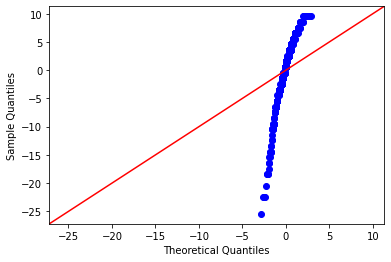

In [87]:
import statsmodels.api as sm
import scipy.stats as stats
eat["Chandler"].mean()
resid = []
for num in targets.Ross:
    resid.append(targets["Ross"].mean() - num)
resid = pd.Series(resid).dropna()
#px.line(resid)
fig = sm.qqplot(resid, line = "45")
plt.show()


In [88]:
resid.describe()

count    4.370000e+02
mean     1.479620e-15
std      6.233655e+00
min     -2.545309e+01
25%     -3.453089e+00
50%      5.469108e-01
75%      4.546911e+00
max      9.546911e+00
dtype: float64

## 2. Mean of Residuals needs to be 0

In [97]:
residuals = pd.DataFrame()
for column in eat.drop(columns = "Etc. Comments").iloc[:,1:].columns:
    data = eat[column]
    resid = []
    for num in data:
        resid.append(data.mean()-num)
    residuals = pd.concat([residuals,(pd.Series(resid, name = column).dropna())], axis = 1)
residuals.dropna()
residuals.mean()

Ross        2.987509e-16
Chandler   -1.820867e-17
BT1         4.917426e-16
BT2        -6.063136e-16
BT3        -7.218984e-16
BT4         1.025055e-15
BT5         2.640090e-15
GR1         5.304681e-16
GR2        -2.438934e-17
GR3        -3.028343e-16
GR4        -1.692010e-16
GR5        -9.389895e-16
Total:      5.319898e-15
All_GR      1.951147e-15
All_BT      6.046132e-15
All_SS     -3.196633e-16
male        3.357375e-16
female     -3.021638e-15
dtype: float64

In [99]:
residuals = pd.DataFrame()
for column in drops.iloc[:,1:].columns:
    data = drops[column]
    resid = []
    for num in data:
        resid.append(data.mean()-num)
    residuals = pd.concat([residuals,(pd.Series(resid, name = column).dropna())], axis = 1)
residuals.dropna()
residuals.mean()

Ross       -1.339618e-16
Chandler   -9.226511e-17
BT1         2.172286e-16
BT2         2.473922e-16
BT3         3.518241e-16
BT4         4.385127e-17
BT5         4.237181e-16
GR1         1.003763e-16
GR2        -5.206388e-16
GR3         7.604267e-17
GR4        -5.525768e-17
GR5         2.154542e-17
Total:      1.504715e-15
All_GR     -3.627235e-16
All_BT     -2.088034e-16
All_SS      2.907365e-16
male       -3.227659e-16
female     -1.046891e-15
dtype: float64

In [100]:
residuals = pd.DataFrame()
for column in targets.iloc[:,1:].columns:
    data = targets[column]
    resid = []
    for num in data:
        resid.append(data.mean()-num)
    residuals = pd.concat([residuals,(pd.Series(resid, name = column).dropna())], axis = 1)
residuals.dropna()
residuals.mean()

Ross        6.056686e-16
Chandler   -2.052769e-15
BT1        -4.487638e-15
BT2         3.162484e-15
BT3        -2.235689e-15
BT4        -4.162447e-15
BT5         1.036547e-15
GR1         3.272236e-16
GR2         1.991796e-16
GR3         1.877979e-15
GR4         2.134067e-16
GR5         5.619710e-16
Total:     -1.733627e-14
All_GR     -2.211300e-15
All_BT     -8.617566e-15
All_SS      5.788403e-15
male        1.308766e-14
female     -5.866251e-15
dtype: float64

## 3. Do the samples have equal variances?

In [105]:
df = pd.DataFrame()
for column in corona_eat.drop(columns = "Etc. Comments").iloc[:,1:]:
    numbers = []
    corona = corona_eat[column]
    opened = open_eat[column]
    if np.std(corona)>np.std(opened):
        num = np.std(corona)/np.std(opened)
    else:
        num = np.std(opened)/np.std(corona)
    numbers.append(num)
    df = pd.concat([df,pd.Series(numbers,name = column)], axis = 1)
df >2
    

,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total:,All_GR,All_BT,All_SS,male,female
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [107]:
df = pd.DataFrame()
for column in corona_drop.iloc[:,1:]:
    numbers = []
    corona = corona_drop[column]
    opened = open_drop[column]
    if np.std(corona)>np.std(opened):
        num = np.std(corona)/np.std(opened)
    else:
        num = np.std(opened)/np.std(corona)
    numbers.append(num)
    df = pd.concat([df,pd.Series(numbers,name = column)], axis = 1)
df >2
    

,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total:,All_GR,All_BT,All_SS,male,female
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [110]:

df = pd.DataFrame()
for column in corona_target.iloc[:,1:]:
    numbers = []
    corona = corona_target[column]
    opened = open_target[column]
    if np.std(corona)>np.std(opened):
        num = np.std(corona)/np.std(opened)
    else:
        num = np.std(opened)/np.std(corona)
    numbers.append(num)
    df = pd.concat([df,pd.Series(numbers,name = column)], axis = 1)
df > 2
    


,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total:,All_GR,All_BT,All_SS,male,female
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
